In [1]:
from tensorflow import keras

In [2]:
# h5 모델 불러오기
model = keras.models.load_model("../Data/best_cnn_model.h5")

2022-07-28 10:40:29.194486: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# 레이어 확인하기 
model.layers
# 0번은 3 * 3 

### kernal size (3*3)로 구성된 이미지 보기

In [5]:
# 32개의 노드로 구성된 레이어 

conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [6]:
# 가중치 보기 
# 현재 weight는 랜덤으로 들어가 있는 상태
conv_weights = conv.weights[0].numpy()
# numpy로 지수를 소수로 바꿈.
print(conv_weights.mean(),conv_weights.std())

-0.03161895 0.26935285


In [7]:
conv_weights
# 여기서 조정해서 보일 이미지 조정 

array([[[[-7.18282759e-02,  1.11184426e-01,  1.00193262e-01,
          -3.81106883e-03, -1.70327339e-03, -2.27200061e-01,
           3.71535309e-02, -2.10085347e-01,  9.49562714e-02,
          -2.16629431e-01, -2.20722944e-01, -1.26091495e-01,
          -2.05378175e-01,  1.31394580e-01, -2.07023099e-01,
           1.74510375e-01, -3.54289591e-01,  2.02681690e-01,
           1.80101484e-01,  3.42860848e-01,  1.22651070e-01,
           3.09004724e-01, -9.17219520e-02, -3.95096913e-02,
          -7.92984128e-01,  2.47185342e-02, -5.56685686e-01,
          -5.66072129e-02,  8.22688118e-02,  5.21664955e-02,
           5.93447126e-02,  2.51988843e-02]],

        [[ 6.74872324e-02, -1.32274747e-01,  7.16565698e-02,
           2.81046098e-03,  7.55454823e-02,  1.36148810e-01,
          -4.84724164e-01, -1.26755804e-01,  4.06703591e-01,
          -2.52380103e-01, -1.09795578e-01,  2.60885805e-01,
           1.12673737e-01, -3.70989367e-02, -5.12349159e-02,
          -2.32733533e-01,  1.43103287

In [8]:
import matplotlib.pyplot as plt

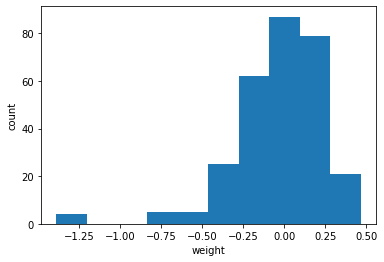

In [13]:
# 시각화 

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()
# 여기서 0 은 검정색(black), 배경이 검다고 추측가능 

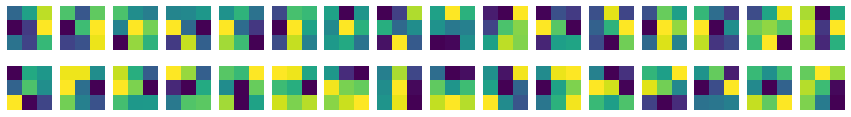

In [16]:
# 이미지로 확인하기 

fig, axs = plt.subplots(2,16,figsize =(15,2))

for i in range(2):
    for j in range(16):
        # (3,3,1,32) 형태로 
        # i * 16 + j = 16 + 16
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j])
        axs[i,j].axis("off")

plt.show()

---
# 특성맵 시각화

In [17]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_4_input'), name='conv2d_4_input', description="created by layer 'conv2d_4_input'")


In [19]:
# model 불러오기 
# acitivation
conv_acti = keras.models.Model(model.input, model.layers[0].output)

In [20]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

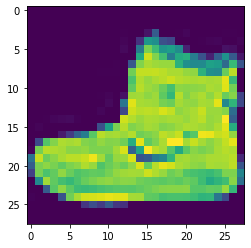

In [22]:
plt.imshow(train_input[0])
plt.show()
# 이걸 토대로 위 상단의 그래프처럼 필터(특징)을 뽑는다.

In [23]:
# 0번을 reshape
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

1/1 [==============================] - 1s 531ms/step
(1, 28, 28, 32)


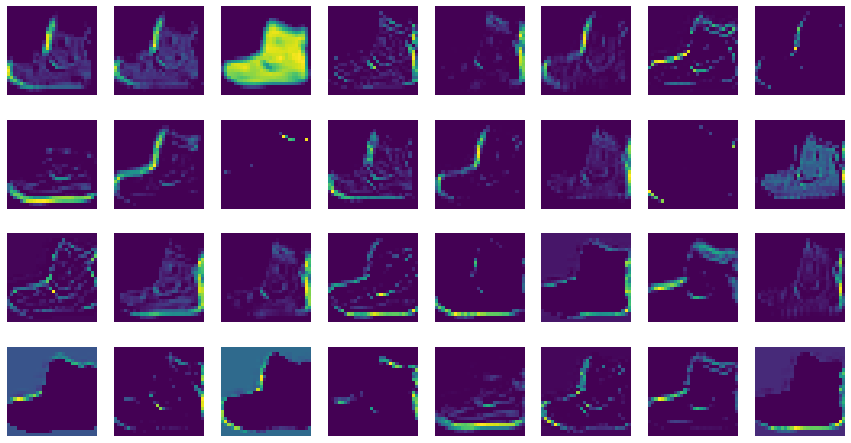

In [25]:
# 이미지로 확인하기 
# 4 * 8 = 32 
fig, axs = plt.subplots(4,8,figsize =(15,8))

for i in range(4):
    for j in range(8):
        # (1,28,28,32)
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis("off")

plt.show()

In [26]:
# 모델 불러오기

conv2_acti = keras.models.Model(model.input, model.layers[2].output)

In [27]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1,28,28,1)/ 255.0)
print(feature_maps.shape)

1/1 [==============================] - 0s 83ms/step
(1, 14, 14, 64)


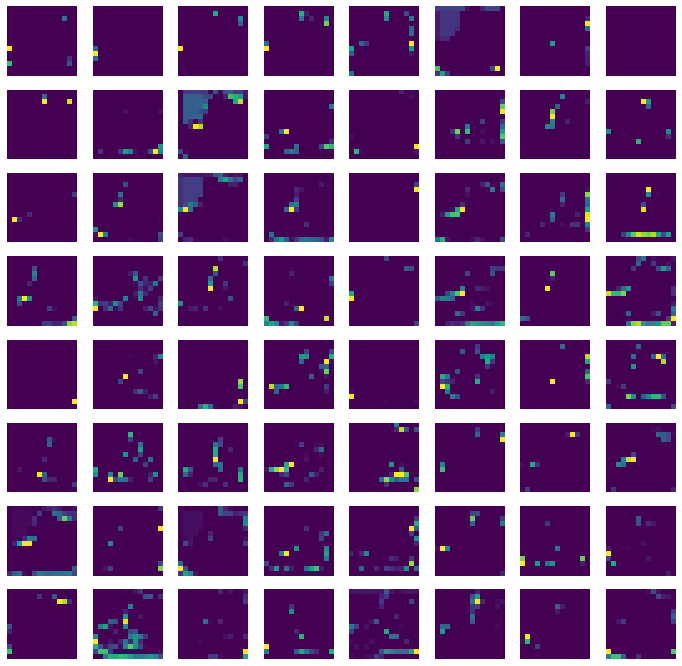

In [32]:
# 이미지로 확인하기 
# max pooling
# 8 * 8 = 64
#  <keras.layers.convolutional.conv2d.Conv2D at 0x7f7adaafa520>,
fig, axs = plt.subplots(8,8,figsize =(12,12))

for i in range(8):
    for j in range(8):
        # (1,28,28,32)
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis("off")

plt.show()